In [62]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"./titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
# check nan values
print(df.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipykernel_5602/2249596087.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

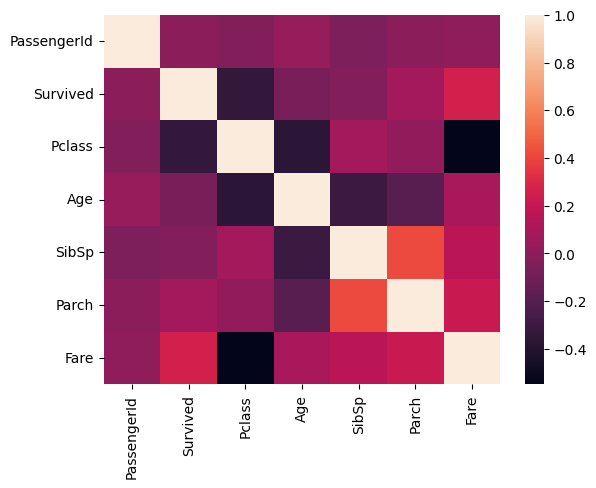

In [64]:
import seaborn as sns
sns.heatmap(df.corr())

<AxesSubplot: xlabel='Survived', ylabel='count'>

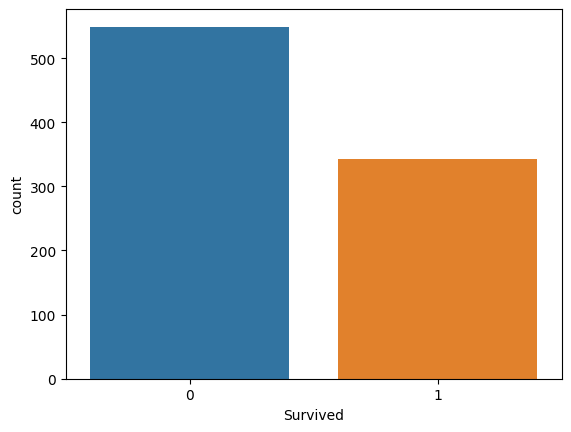

In [65]:
sns.countplot(x='Survived',data=df)

<AxesSubplot: xlabel='Survived', ylabel='count'>

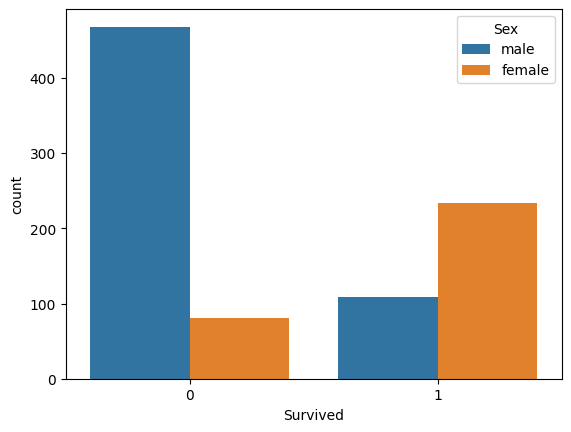

In [66]:
sns.countplot(x='Survived',data=df,hue='Sex')

<AxesSubplot: xlabel='Survived', ylabel='count'>

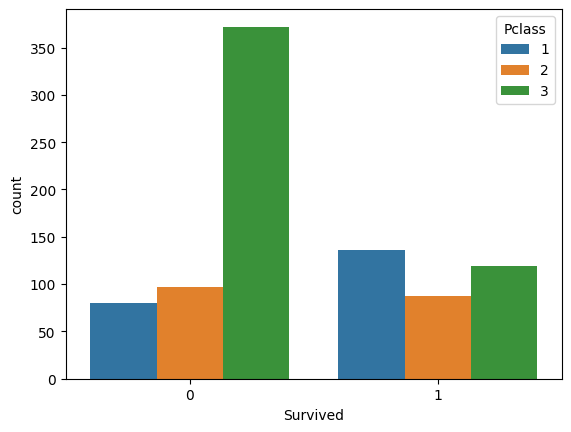

In [67]:
sns.countplot(x='Survived',data=df,hue='Pclass')

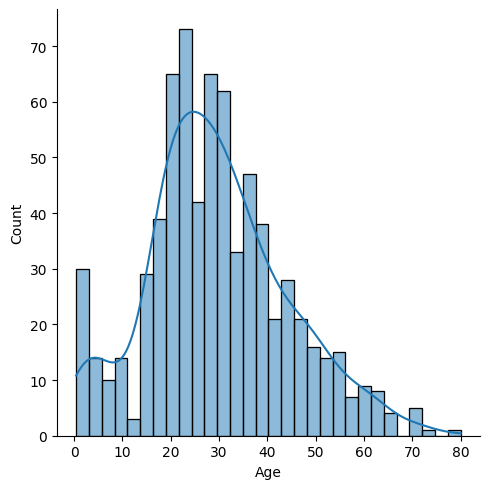

In [68]:
sns.displot(data=df['Age'].dropna(),kde=True,bins=30)

<AxesSubplot: xlabel='Survived', ylabel='count'>

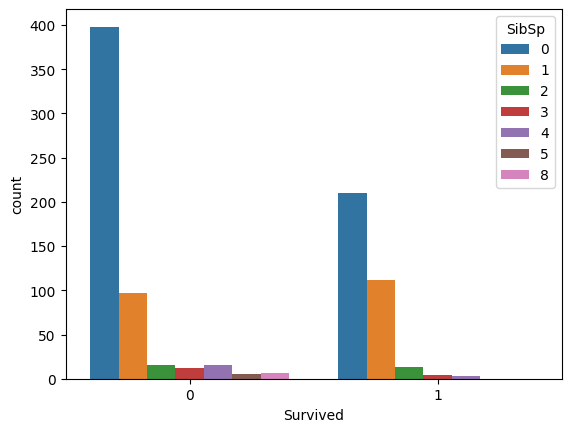

In [69]:
sns.countplot(x='Survived',data=df,hue='SibSp')

<AxesSubplot: xlabel='Survived', ylabel='count'>

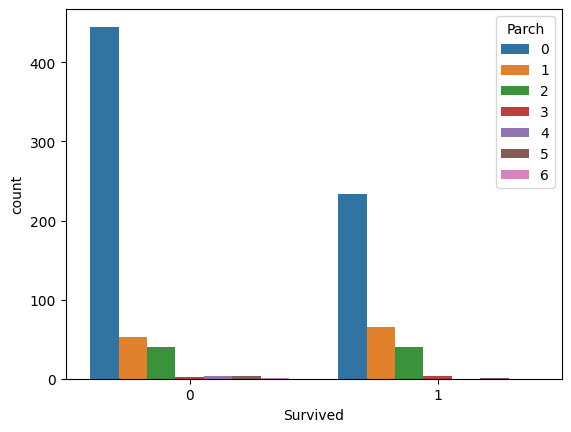

In [70]:
sns.countplot(x='Survived',data=df,hue='Parch')

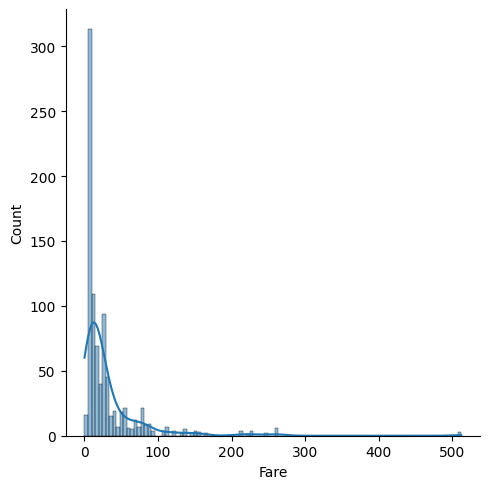

In [71]:
sns.displot(df['Fare'],kde=True)

In [72]:
# handling the cabin column
df = df.drop(columns='Cabin')

In [73]:
# handle the missing values in age
df['Age']=df['Age'].fillna(df['Age'].mean())

In [74]:
# handle the missing value in Embarked
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [75]:
# separete the dependent and independent variable

y=df['Survived']
x=df.drop(columns='Survived')


In [76]:
# Feature Selection

cor=df.corr()
cor

x = x.drop(columns=['Ticket', 'Name', 'PassengerId'])


/tmp/ipykernel_5602/337825182.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Sex']=le.fit_transform(x['Sex'])
x


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,S
1,1,0,38.000000,1,0,71.2833,C
2,3,0,26.000000,0,0,7.9250,S
3,1,0,35.000000,1,0,53.1000,S
4,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,S
887,1,0,19.000000,0,0,30.0000,S
888,3,0,29.699118,1,2,23.4500,S
889,1,1,26.000000,0,0,30.0000,C


In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('encode',OneHotEncoder(),[6])],remainder='passthrough')
x=ct.fit_transform(x)


In [79]:
# standard scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [80]:
# splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [81]:
# Training : Logistic Regression 

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

In [82]:
# accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7988826815642458


In [83]:
# Training and accuracy using SVC

from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


In [84]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8100558659217877


In [85]:
import joblib
joblib.dump(classifier,'titanic_classifier.joblib')
joblib.dump(le,'sex.joblib')
joblib.dump(ct,'tit_ct.joblib')
joblib.dump(sc,'tit_sc.joblib')


['tit_sc.joblib']